# COVID-19-Portugal - Last 60 Days Daily Evolution  

<dir style="float:right; a.color: grey;">
    <a href="https://github.com/matosdotnet">
        <img src="https://avatars3.githubusercontent.com/u/64945038?s=60&v=4">
        matosdotnet
    </a>
</dir>

<ul> 
        <li>New Cases</li>
        <li>New Deaths</li>
        <li>New Suspects</li>
        <li>New Recovered</li>
      </ul>
       Data Source: 
        <a href="https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv">https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv</a>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Define the last number of days here
nr_last_days = 60
s_title = 'COVID-19 Portugal'
s_url = 'https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv'

In [2]:
#define dictionaries with metadata
d_confirmations = {'key' : 'confirmados', 'label' : 'Cases', 'color' : '#00D0FE'}
d_new_confirmations = {'key' : 'confirmados_novos', 'label' : 'New Cases', 'color' : '#00D0FE'}

d_deaths = {'key' : 'obitos', 'label' : 'Deaths', 'color' : '#FE0004'}
d_new_deaths = {'key' : 'obitos_novos', 'label' : 'New Deaths', 'color' : '#FE0004'}

d_suspects = {'key' : 'suspeitos', 'label' : 'Suspects', 'color' : '#FE6C00'}
d_new_suspects = {'key' : 'suspeitos_novos', 'label' : 'New Suspects', 'color' : '#FE6C00'}

d_recoveries = {'key' : 'recuperados', 'label' : 'Recoveries', 'color' : '#7FFE00'}
d_new_recoveries = {'key' : 'recuperados_novos', 'label' : 'New Recoveries', 'color' : '#7FFE00'}

d_icu = {'key' : 'internados_uci', 'label' : 'ICU Patients', 'color' : '#FEFE00'}
d_new_icu = {'key' : 'internados_uci_novos', 'label' : 'New ICU Patients', 'color' : '#FEFE00'}

# Read Source Data
df_full = pd.read_csv(s_url)

In [3]:
# Manage Dates Formating and Set Index
df_full['data'] = df_full['data'].apply(lambda x : pd.to_datetime(x,format='%d-%m-%Y'))
df_full['data_dados'] = df_full['data_dados'].apply(lambda x : pd.to_datetime(x,format='%d-%m-%Y %H:%M'))
df_full = df_full.set_index('data_dados')

In [4]:
# New Deaths 
df_full[d_new_deaths['key']] = df_full[d_deaths['key']].diff()
# New Recovered
df_full[d_new_recoveries['key']] = df_full[d_recoveries['key']].diff()
# New Suspects
df_full[d_new_suspects['key']] = df_full[d_suspects['key']].diff()
#New ICU Patients
df_full[d_new_icu['key']] = df_full[d_icu['key']].diff()

In [5]:
# Slice the last days
df_latest = df_full.tail(nr_last_days )

In [6]:
import matplotlib.dates as mdates
import datetime
%matplotlib inline

def covid19_plot_df(y,data,title,ylabel,ycolor):
    #Set Style
    sns.set_style('darkgrid', 
              {
                  'axes.facecolor': '#646666',
                  'figure.facecolor': '#646666',
                  'grid.color': 'lightgrey',
                  'grid.linestyle': 'dotted',
                  'xtick.color': 'white',
                  'xtick.top': False,
                  'xtick.bottom': True,
                  'ytick.color': 'white',
                  'ytick.left': True,
                  'ytick.right': False,
                  'axes.labelcolor': 'white',
                  'axes.spines.top': False,
                  'axes.spines.right': False,
                  'text.color': 'white'
                  
              })

    #Set Fig Size
    fig = plt.figure(figsize=(12,5))

    #Line Plot with mean
    v_mean = data[y].mean()
    
    ax = sns.lineplot(x=df_latest.index,y=v_mean
                      ,color = '#5CFE00'
                      ,alpha = 0.2        
                      ,dashes=True
                     # ,estimator = 'mean'
                     )
    
    #Line Plots with Standard Deviation
    v_std =  data[y].std()

    ax = sns.lineplot(x=df_latest.index,y=v_mean + v_std
                      ,color = '#5CFE00'
                      ,alpha = 0.2        
                      ,dashes=True
                     # ,estimator = 'mean'
                     )
    
    ax.lines[1].set_linestyle('dotted')
    
    ax = sns.lineplot(x=df_latest.index,y=v_mean - v_std
                      ,color = '#5CFE00'
                      ,alpha = 0.2        
                      ,dashes=True
                     # ,estimator = 'mean'
                     )
    ax.lines[2].set_linestyle('dotted')
    
    #Line Plot with data

    ax = sns.lineplot(x=df_latest.index,y=data[y]
                      ,marker=True
                      ,markers=["o", "o"]
                      ,alpha = 0.5
                      ,dashes=False
                      ,style=True
                      ,hue = 1
                      ,palette = [ycolor]
                     # ,estimator = 'mean'
                     )

    # Rerieve Max, Min and Latest
    y_max = data[y].max()
    x_max = data[[y]].idxmax()[0]
    y_min = data[y].min()
    x_min = data[[y]].idxmin()[0]
    y_mean = y_max+y_max*0.10
    x_mean = data[[y]].index[0]
    x_latest =  data.index.max()
    y_latest = data[x_latest:x_latest][y][0]

    # Slice the chart canvas
    ax.set_xlim(data.index.min(), data.index.max()+datetime.timedelta(days=1))
      
    if y_min >= 0 :
        ax.set_ylim(0, y_max+y_max*0.10)
    else :
        ax.set_ylim(y_min+y_min*0.10, y_max+y_max*0.10)

    #Set Date Format
    str_date_format = '%d/%m'

    #Anotattions for Max, Min and Latest
    lbl_y_offset = 0.02*y_max
    lbl_y_max_offset = 0.02*y_max
    lbl_y_min_offset = 0.02*y_min

    ax.annotate('  MAX: {} \n {}'.format(y_max,x_max.strftime(str_date_format))
                ,xy=(x_max,y_max)
                ,xytext=(x_max,y_max+lbl_y_max_offset)
                ,ha='center')

    ax.annotate('  MIN: {} \n {}'.format(y_min,x_min.strftime(str_date_format))
                ,xy=(x_min,y_min)
                ,xytext=(x_min,y_min+lbl_y_min_offset)
                ,ha='center')

    ax.annotate('  {} \n {}'.format(y_latest,x_latest.strftime(str_date_format))
                ,xy=(x_latest,y_latest)
                ,xytext=(x_latest,y_latest+lbl_y_offset)
                ,ha='center')
    
    ax.annotate('AVG: {0:.1f} STD: {1:.1f}'.format(v_mean,v_std)
                ,xy=(x_mean,y_mean)
                ,xytext=(x_mean,y_mean+lbl_y_offset)
                ,ha='left',color='#5CFE00')

    #Axis and Labels formating
    ax.set_title(title)
    
    #Make sure the datase has continuous dates in the DataFrame
    ax.set_xlabel('Last {0} days'.format(len(df_latest.index)))
    ax.set_ylabel(ylabel.format(nr_last_days))

    myFmt = mdates.DateFormatter(str_date_format)
    ax.xaxis.set_major_formatter(myFmt)
    ax.legend().remove()

    # Fill Area
    plt.fill_between( data.index, data[y], color=ycolor, alpha=0.2)
    
    fig.savefig("{}.png".format(title),bbox_inches = 'tight', dpi=plt.gcf().dpi,facecolor='#646666')
    
    plt.show()

In [7]:
df_latest[[d_confirmations['key'],d_new_confirmations['key'],d_deaths['key'],d_new_deaths['key'],d_suspects['key'],d_new_suspects['key'],d_recoveries['key'],d_new_recoveries['key'],d_icu['key'],d_new_icu['key']]].tail(1)

,confirmados,confirmados_novos,obitos,obitos_novos,suspeitos,suspeitos_novos,recuperados,recuperados_novos,internados_uci,internados_uci_novos
data_dados,,,,,,,,,,
2020-05-22,30200,288,1289,12.0,306171,2360.0,7590,1138.0,84.0,-8.0


In [8]:
# Last X count days overall description
df_latest[[d_new_confirmations['key'],d_new_deaths['key'],d_new_suspects['key'],d_new_recoveries['key'],d_new_icu['key']]].describe()

,confirmados_novos,obitos_novos,suspeitos_novos,recuperados_novos,internados_uci_novos
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,469.000000,21.100000,4874.950000,126.266667,0.616667
std,274.847384,8.323339,3607.485407,294.733080,14.272282
min,92.000000,6.000000,161.000000,0.000000,-40.000000
25%,227.750000,15.000000,2940.750000,5.500000,-7.000000
50%,449.000000,20.000000,3896.000000,28.000000,-2.000000
75%,646.500000,27.250000,6716.500000,83.500000,5.000000
max,1516.000000,37.000000,24893.000000,1794.000000,49.000000


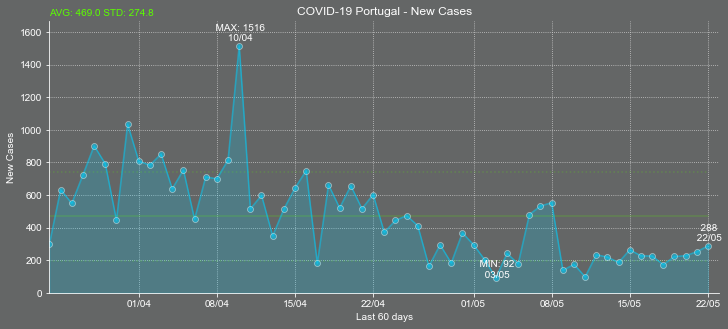

In [9]:
covid19_plot_df(
                d_new_confirmations['key']
                ,data=df_latest
                ,title='{} - {}'.format(s_title,d_new_confirmations['label'])
                ,ylabel=d_new_confirmations['label']
                ,ycolor=d_new_confirmations['color']
               )

In [10]:
# Trace outstanding vales
df_latest[[d_confirmations['key'],d_new_confirmations['key']]]['2020-04-09':'2020-04-11']

,confirmados,confirmados_novos
data_dados,,
2020-04-09,13956,815
2020-04-10,15472,1516
2020-04-11,15987,515


DGS Report: <a href="https://covid19.min-saude.pt/wp-content/uploads/2020/04/39_DGS_boletim_20200410.pdf">Relatório de Situação nº 039 | 10/04/2020</a>

News: 
<br/>
    <a href="https://www.publico.pt/2020/04/10/sociedade/noticia/covid19-ha-26-mortes-1516-infectados-portugal-1911826">Covid-19: há mais 26 mortes e mais 1516 infectados em Portugal<a/>
    <br/>
    <a href="https://www.jornaldenegocios.pt/economia/coronavirus/detalhe/morreram-mais-26-pessoas-em-portugal-com-covid-19-e-casos-confirmados-aumentam-mais-de-10">Morreram mais 26 pessoas em Portugal com covid-19 e casos confirmados aumentam mais de 10%</a>

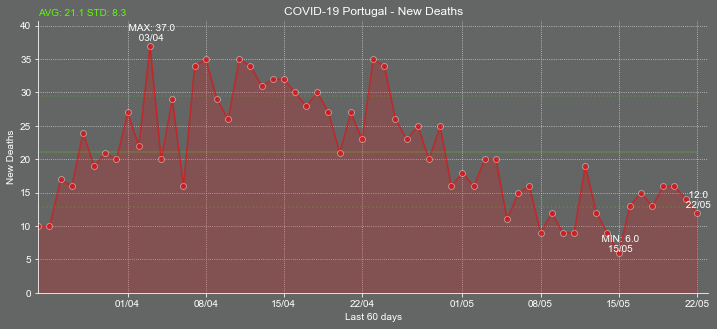

In [11]:
covid19_plot_df(
                d_new_deaths['key']
                ,data=df_latest
                ,title='{} - {}'.format(s_title,d_new_deaths['label'])
                ,ylabel=d_new_deaths['label']
                ,ycolor=d_new_deaths['color']
               )


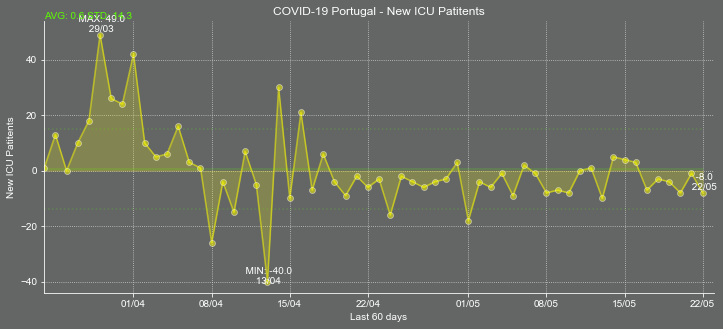

In [12]:
covid19_plot_df(
                d_new_icu['key']
                ,data=df_latest
                ,title='{} - {}'.format(s_title,d_new_icu['label'])
                ,ylabel=d_new_icu['label']
                ,ycolor=d_new_icu['color']
               )

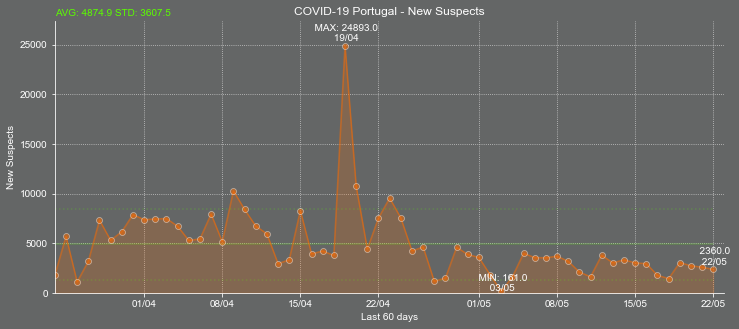

In [13]:
covid19_plot_df(
                d_new_suspects['key']
                ,data=df_latest
                ,title='{} - {}'.format(s_title,d_new_suspects['label'])
                ,ylabel=d_new_suspects['label']
                ,ycolor=d_new_suspects['color']
               )

In [14]:
# Trace outstanding vales
df_latest[[d_suspects['key'],d_new_suspects['key']]]['2020-04-18':'2020-04-20']

,suspeitos,suspeitos_novos
data_dados,,
2020-04-18,162711,3771.0
2020-04-19,187604,24893.0
2020-04-20,198353,10749.0


DGS Report: <a href="https://covid19.min-saude.pt/wp-content/uploads/2020/04/48_DGS_boletim_20200419.pdf">Relatório de Situação nº 048 | 19/04/2020</a>

News: 
<br/>
    <a href="https://rr.sapo.pt/2020/04/22/pais/dgs-explica-aumento-de-35-mil-casos-suspeitos-com-atraso-nas-notificacoes/noticia/190207/">DGS explica aumento de 35 mil casos suspeitos com atraso nas notificações - Renascença<a/>
    <br/>
    <a href="https://rr.sapo.pt/2020/04/20/pais/mais-35-mil-casos-suspeitos-em-48-horas-dgs-explica-o-metodo-mas-nao-a-variacao/noticia/189916/">Mais 35 mil casos suspeitos em 48 horas? DGS explica o método, mas não a variação</a>

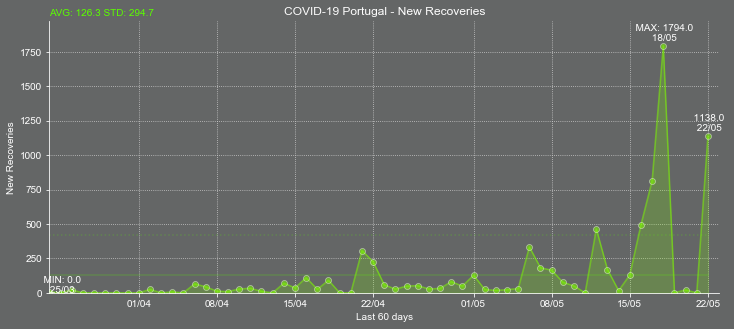

In [15]:
covid19_plot_df(
                d_new_recoveries['key']
                ,data=df_latest
                ,title='{} - {}'.format(s_title,d_new_recoveries['label'])
                ,ylabel=d_new_recoveries['label']
                ,ycolor=d_new_recoveries['color']
               )

In [16]:
# Trace outstanding vales
df_latest[[d_recoveries['key'],d_new_recoveries['key']]]['2020-05-17':'2020-05-19']

,recuperados,recuperados_novos
data_dados,,
2020-05-17,4636,814.0
2020-05-18,6430,1794.0
2020-05-19,6431,1.0


DGS Report: <a href="https://covid19.min-saude.pt/wp-content/uploads/2020/05/77_DGS_boletim_20200518.pdf">Relatório de Situação nº 077 | 18/05/2020</a>

News: <a href='https://www.rtp.pt/noticias/pais/forte-subida-de-recuperados-deve-se-as-instituicoes-reportarem-mais-dgs_n1229822'>Forte subida de recuperados deve-se às instituições reportarem mais - DGS<a/>

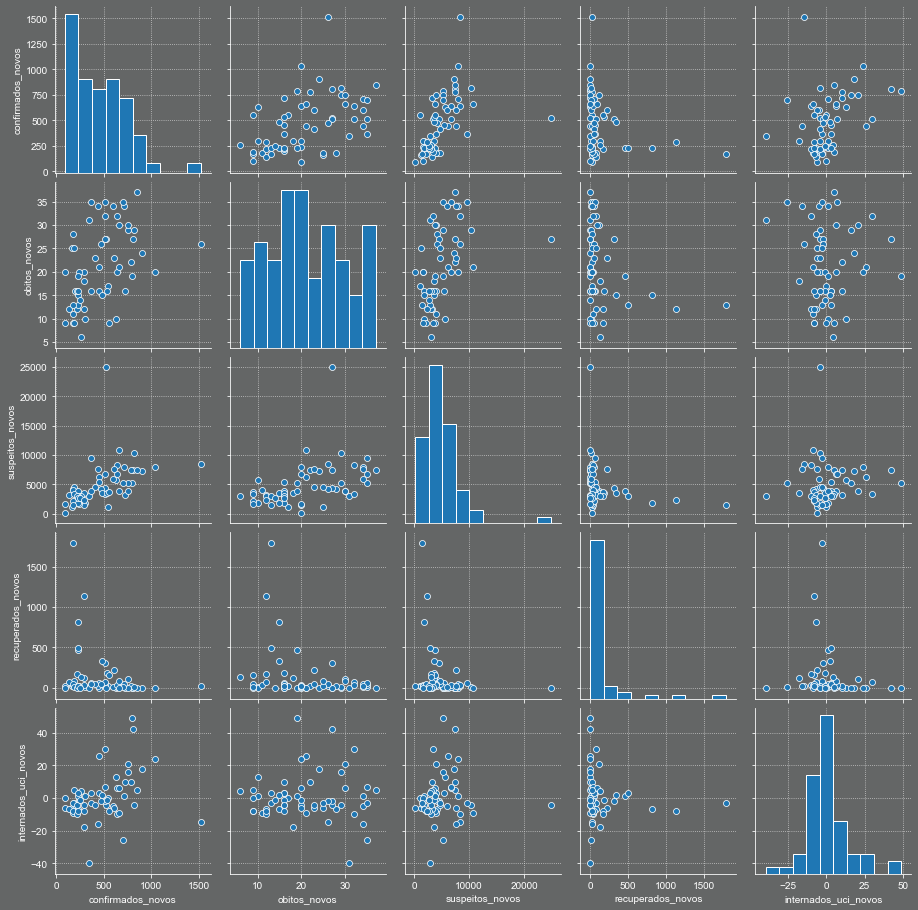

In [17]:
sns.pairplot(df_latest[[d_new_confirmations['key'],d_new_deaths['key'],d_new_suspects['key'],d_new_recoveries['key'],d_new_icu['key']]])